# Modelo con red neuronal sencilla

Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

Carga de archivos train y test y visualización del dataframe train
- Cambiar la ruta de lectura del archivo

In [2]:
df_train = pd.read_csv(r'C:\Users\Lenovo LOQ\Desktop\maswel\train.csv')
df_test = pd.read_csv(r'C:\Users\Lenovo LOQ\Desktop\maswel\test.csv')
df_train

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


## Preprocesamiento

Se aplica el mismo preprocesamiento del archivo anterior

In [ ]:
ordenes = {
    'ESTU_PRGM_ACADEMICO':df_train['ESTU_PRGM_ACADEMICO'].unique().tolist(),
    'ESTU_PRGM_DEPARTAMENTO':df_train['ESTU_PRGM_DEPARTAMENTO'].unique().tolist(),
    'ESTU_VALORMATRICULAUNIVERSIDAD':['No pagó matrícula','Menos de 500 mil','Entre 500 mil y menos de 1 millón','Entre 1 millón y menos de 2.5 millones','Entre 2.5 millones y menos de 4 millones','Entre 4 millones y menos de 5.5 millones','Entre 5.5 millones y menos de 7 millones','Más de 7 millones'],
    'ESTU_HORASSEMANATRABAJA':['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],
    'FAMI_ESTRATOVIVIENDA':['Sin Estrato','Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6'],
    'FAMI_TIENEINTERNET':['No','Si'],
    'FAMI_EDUCACIONPADRE':['No Aplica','Ninguno','No sabe','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta','Técnica o tecnológica completa','Educación profesional incompleta','Educación profesional completa','Postgrado'],
    'FAMI_TIENELAVADORA':['No','Si'],
    'FAMI_TIENEAUTOMOVIL':['No','Si'],
    'ESTU_PRIVADO_LIBERTAD':['S','N'],
    'ESTU_PAGOMATRICULAPROPIO':['Si','No'],
    'FAMI_TIENECOMPUTADOR':['No','Si'],
    'FAMI_EDUCACIONMADRE':['No Aplica','Ninguno','No sabe','Primaria incompleta','Primaria completa','Secundaria (Bachillerato) incompleta','Secundaria (Bachillerato) completa','Técnica o tecnológica incompleta','Técnica o tecnológica completa','Educación profesional incompleta','Educación profesional completa','Postgrado'],
    'RENDIMIENTO_GLOBAL':['bajo','medio-bajo','medio-alto','alto'],
}


df = df_train.copy()
df.drop(columns=['ID', 'PERIODO', 'FAMI_TIENEINTERNET.1'], inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns

encoders = {}
for col in cat_cols:
    oe = OrdinalEncoder(categories=[ordenes[col]])
    not_null_mask = df_train[col].notna()
    df.loc[not_null_mask, col] = oe.fit_transform(df_train.loc[not_null_mask, [col]])
    encoders[col] = oe

In [ ]:
imputer_cat = IterativeImputer(
    estimator=None,           
    max_iter=10,              
    tol=1e-3,                 
    n_nearest_features=None,  
    initial_strategy='most_frequent',  
    random_state=42          
)

df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

## Red neuronal

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
X = df[df.columns.difference(['RENDIMIENTO_GLOBAL'])]
y = df['RENDIMIENTO_GLOBAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
num_classes = len(df["RENDIMIENTO_GLOBAL"].unique())

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=1e-3)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-5
)

In [8]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=1024,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

Epoch 1/100
433/433 [==============================] - 8s 14ms/step - loss: 1.5854 - accuracy: 0.3387 - val_loss: 1.4211 - val_accuracy: 0.3679 - lr: 0.0010
Epoch 2/100
433/433 [==============================] - 6s 13ms/step - loss: 1.3704 - accuracy: 0.3751 - val_loss: 1.3305 - val_accuracy: 0.3858 - lr: 0.0010
Epoch 3/100
433/433 [==============================] - 6s 13ms/step - loss: 1.3113 - accuracy: 0.3831 - val_loss: 1.3035 - val_accuracy: 0.3870 - lr: 0.0010
Epoch 4/100
433/433 [==============================] - 6s 13ms/step - loss: 1.2937 - accuracy: 0.3859 - val_loss: 1.2929 - val_accuracy: 0.3827 - lr: 0.0010
Epoch 5/100
433/433 [==============================] - 6s 13ms/step - loss: 1.2884 - accuracy: 0.3866 - val_loss: 1.2855 - val_accuracy: 0.3873 - lr: 0.0010
Epoch 6/100
433/433 [==============================] - 6s 13ms/step - loss: 1.2871 - accuracy: 0.3859 - val_loss: 1.2797 - val_accuracy: 0.3878 - lr: 0.0010
Epoch 7/100
433/433 [==============================] - 6s 

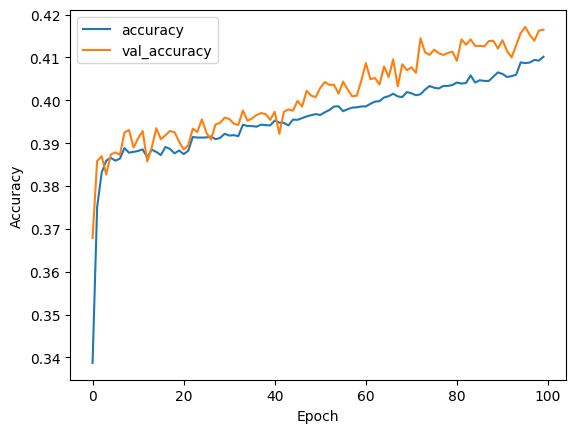

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4329/4329 [==============================] - 4s 864us/step


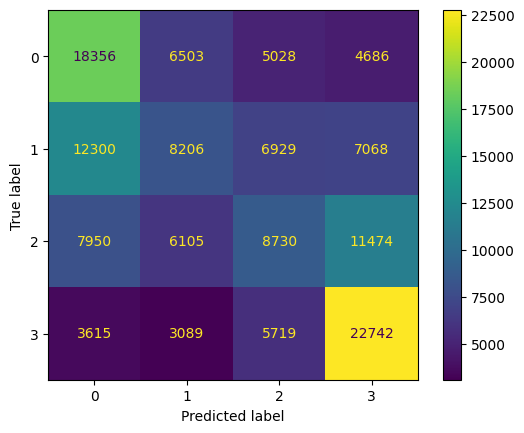

In [10]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

El modelo finalmente tiene un aacuracy de 42%. Teniendo en cuenta que la variable objetivo tiene 4 clases balanceadas, el azar es alrededor del 25%, lo cual indica que el modelo es mejor que el azar. En la matriz de confusión se observa que el modelo tiende a asignar casi siempre rendimiento bajo (clase 0), lo cual da un resultado bueno para los valores que en realidad tenían este valor. Por otro lado, predice relativamente bien el rendimiento alto (clase 3)